In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#import figurefirst as fifi
import seaborn as sns
import numpy as np
import pandas as pd
import json
import pickle

### Load data from mse files to a dataframe

In [2]:
pwd

'/Users/rohan/Desktop/Protein_ContactMaps_DL_BindingAffinity/main/results_figures/training_curves'

In [11]:
import pandas as pd

# Define the file paths and method names
file_paths = ['mse_davis_pconcs4_original_1.txt',  'mse_davis_esm_original_1.txt', 'mse_davis_alpha_cmap_original_0.txt','mse_davis_rand_original_1.txt','mse_davis_esm1d_k_0.txt','mse_davis_klifs1d_0.txt']
method_names = ['Pconsc4', 'ESM','Alphafold2',  'Random','ESM(1D)','KLIFS(1D)']

# Initialize an empty list to store the data
data = []

# Loop through each file path and read in the MSE values
for i, file_path in enumerate(file_paths):
    # Read in the data from the file
    with open(file_path, 'r') as f:
        mse_values = f.read().splitlines()
    # Convert the MSE values to float and add the method and epoch information
    for j, mse in enumerate(mse_values):
        data.append([method_names[i], j+1, float(mse)])

# Create a dataframe from the data
df = pd.DataFrame(data, columns=['Method', 'Epoch', 'MSE'])

# Print the dataframe
print(df)


          Method  Epoch       MSE
0        Pconsc4      1  0.729654
1        Pconsc4      2  0.661611
2        Pconsc4      3  0.623757
3        Pconsc4      4  0.573655
4        Pconsc4      5  0.556815
...          ...    ...       ...
11995  KLIFS(1D)   1996  0.294905
11996  KLIFS(1D)   1997  0.303866
11997  KLIFS(1D)   1998  0.289215
11998  KLIFS(1D)   1999  0.289352
11999  KLIFS(1D)   2000  0.291189

[12000 rows x 3 columns]


In [16]:
df.to_csv('mse_davis_proteins.csv',index=False)

,Method,Epoch,MSE
0,Pconsc4,1,0.729654
1,Pconsc4,2,0.661611
2,Pconsc4,3,0.623757
3,Pconsc4,4,0.573655
4,Pconsc4,5,0.556815
...,...,...,...
11995,KLIFS(1D),1996,0.294905
11996,KLIFS(1D),1997,0.303866
11997,KLIFS(1D),1998,0.289215
11998,KLIFS(1D),1999,0.289352


In [20]:
df_davis_proteins=pd.read_csv('mse_davis_proteins.csv')

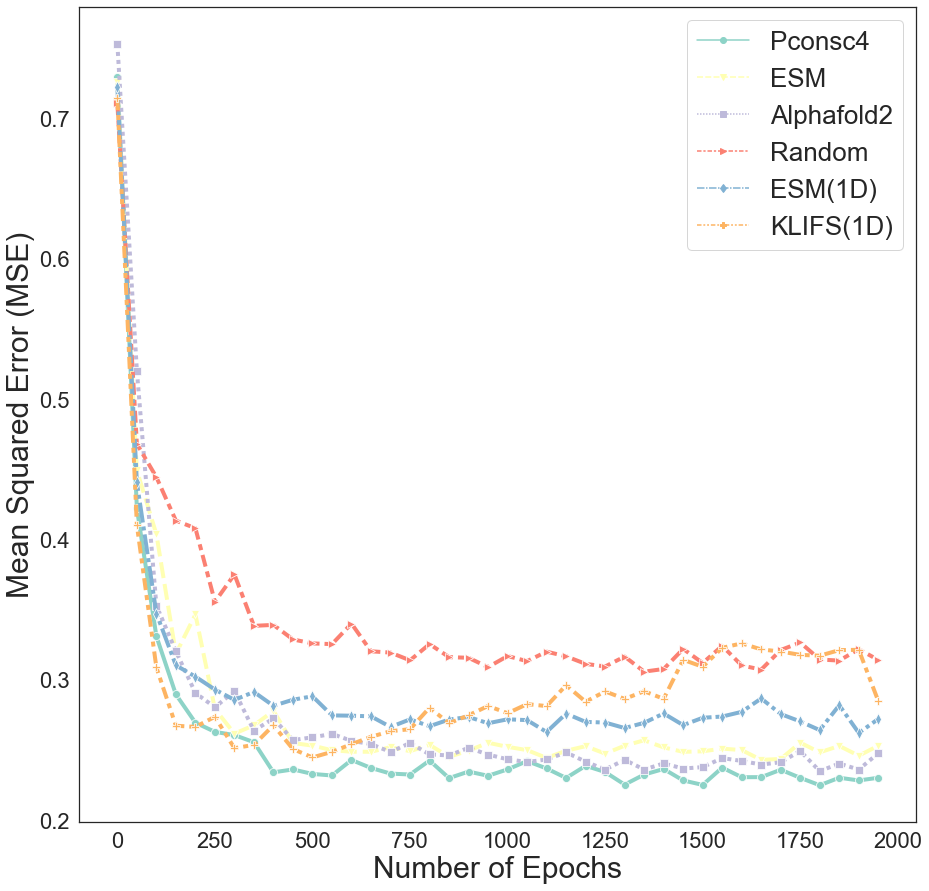

In [25]:

# Set plot style
sns.set(font_scale = 2,style="white")

# colors = sns.color_palette("Set3", n_colors=8)
# custom_palette = [colors[4], colors[5]]
# Create line plot
fig = plt.figure(figsize=(15, 15))
ax = sns.lineplot(x='Epoch', y='MSE', hue='Method', data=df_davis_proteins[::50], palette='Set3', style="Method",
                  markers=["o", "v", "s", ">", "d", "P"], estimator=None, lw=4, ms=8)

# Set plot labels and legend
ax.set_xlabel('Number of Epochs', fontsize=30)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=30)
plt.legend(loc='upper right', fontsize=26)

# Save plot in different formats
fig.savefig(os.path.join('results_mses','mse_davis_proteins' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_davis_proteins' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_davis_proteins' + '.svg'), dpi=500, bbox_inches='tight')


In [26]:
import pandas as pd

# Define the file paths and method names
file_paths = ['mse_davis_pconcs4_original_1.txt', 'mse_davis_pconcs4_congeneric_0.txt', 'mse_davis_pconcs4_random_node_4.txt', 'mse_davis_pconcs4_random_2.txt']
method_names = ['Original','Point Random', 'Random Node','Random']

# Initialize an empty list to store the data
data = []

# Loop through each file path and read in the MSE values
for i, file_path in enumerate(file_paths):
    # Read in the data from the file
    with open(file_path, 'r') as f:
        mse_values = f.read().splitlines()
    # Convert the MSE values to float and add the method and epoch information
    for j, mse in enumerate(mse_values):
        data.append([method_names[i], j+1, float(mse)])

# Create a dataframe from the data
df1 = pd.DataFrame(data, columns=['Method', 'Epoch', 'MSE'])

# Print the dataframe
print(df1)


        Method  Epoch       MSE
0     Original      1  0.729654
1     Original      2  0.661611
2     Original      3  0.623757
3     Original      4  0.573655
4     Original      5  0.556815
...        ...    ...       ...
7995    Random   1996  0.523478
7996    Random   1997  0.524297
7997    Random   1998  0.546734
7998    Random   1999  0.546471
7999    Random   2000  0.528049

[8000 rows x 3 columns]


In [28]:
df1.to_csv('mse_davis_ligands.csv',index=False)

In [30]:
colors = sns.color_palette("Pastel1", n_colors=12)
colors1 = sns.color_palette("Set3", n_colors=10)
custom_palette = [colors1[0], colors[6],colors1[9],colors1[8]]

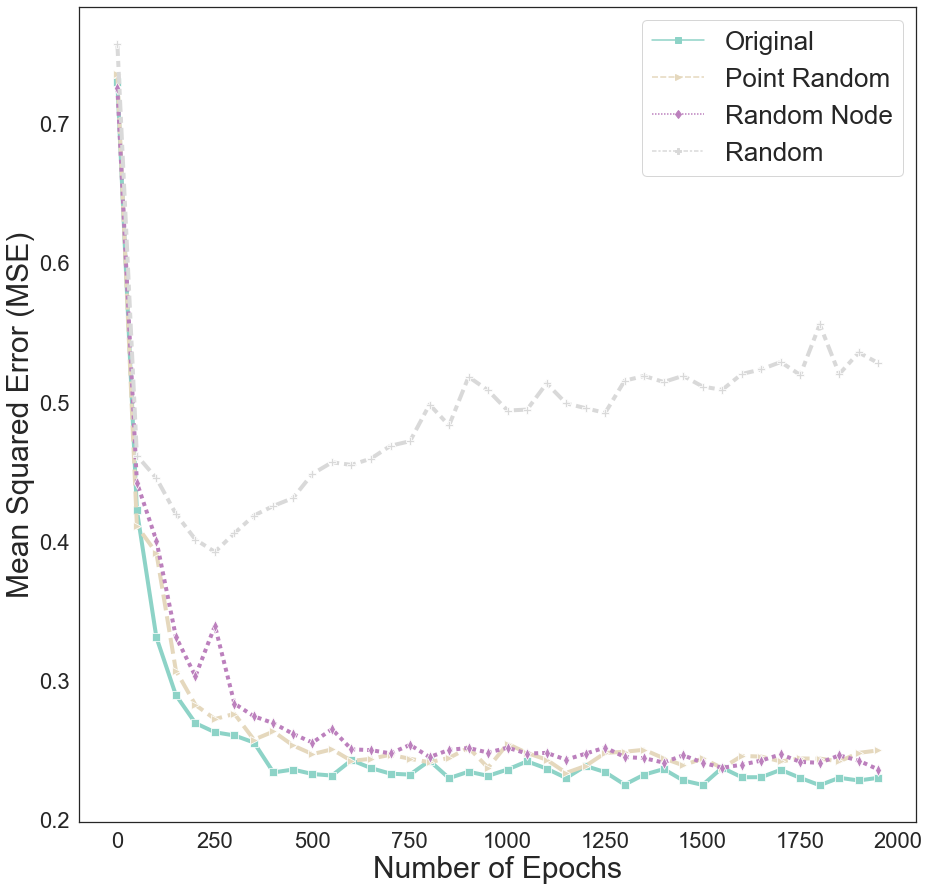

In [33]:

# Set plot style
sns.set(font_scale = 2,style="white")

# colors = sns.color_palette("Set3", n_colors=8)
# custom_palette = [colors[4], colors[5]]
# Create line plot
fig = plt.figure(figsize=(15, 15))
ax = sns.lineplot(x='Epoch', y='MSE', hue='Method', data=df1[::50], palette=custom_palette, style="Method",
                  markers=["s", ">", "d", "P"], estimator=None, lw=4, ms=8)

# Set plot labels and legend
ax.set_xlabel('Number of Epochs', fontsize=30)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=30)
plt.legend(loc='upper right', fontsize=26)

# Save plot in different formats
fig.savefig(os.path.join('results_mses','mse_davis_ligands' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_davis_ligands' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_davis_ligands' + '.svg'), dpi=500, bbox_inches='tight')


In [39]:
import pandas as pd

# Define the file paths and method names
file_paths = ['mse_davis_pconcs4_original_1.txt', 'mse_davis_pconcs4_original_1_product.txt', 'mse_davis_pconcs4_original_2_concat_productA.txt']
method_names =['Concat','Product','Concat+Product']

# Initialize an empty list to store the data
data = []

# Loop through each file path and read in the MSE values
for i, file_path in enumerate(file_paths):
    # Read in the data from the file
    with open(file_path, 'r') as f:
        mse_values = f.read().splitlines()
    # Convert the MSE values to float and add the method and epoch information
    for j, mse in enumerate(mse_values):
        data.append([method_names[i], j+1, float(mse)])

# Create a dataframe from the data
df2 = pd.DataFrame(data, columns=['Method', 'Epoch', 'MSE'])

# Print the dataframe
print(df2)


              Method  Epoch       MSE
0             Concat      1  0.729654
1             Concat      2  0.661611
2             Concat      3  0.623757
3             Concat      4  0.573655
4             Concat      5  0.556815
...              ...    ...       ...
5995  Concat+Product   1996  0.225781
5996  Concat+Product   1997  0.224624
5997  Concat+Product   1998  0.228028
5998  Concat+Product   1999  0.231825
5999  Concat+Product   2000  0.223404

[6000 rows x 3 columns]


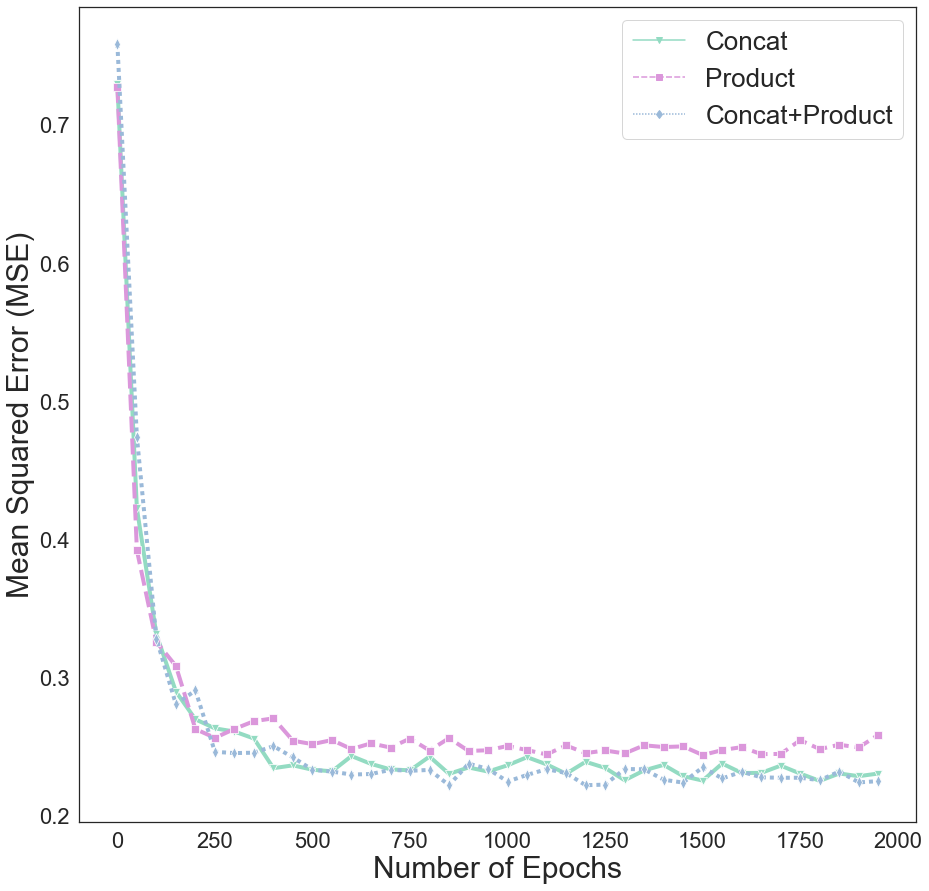

In [40]:

# Set plot style
sns.set(font_scale = 2,style="white")


custom_palette = ['#93DBC2','#DB97DB','#9AB9D9']
# Create line plot
fig = plt.figure(figsize=(15, 15))
ax = sns.lineplot(x='Epoch', y='MSE', hue='Method', data=df2[::50], palette=custom_palette, style="Method",
                  markers=["v", "s", "d"], estimator=None, lw=4, ms=8)

# Set plot labels and legend
ax.set_xlabel('Number of Epochs', fontsize=30)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=30)
plt.legend(loc='upper right', fontsize=26)

# Save plot in different formats
fig.savefig(os.path.join('results_mses','mse_davis_combined' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_davis_combined' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_davis_combined' + '.svg'), dpi=500, bbox_inches='tight')


In [41]:
df2.to_csv('mse_davis_combined.csv',index=False)

In [45]:
import pandas as pd

# Define the file paths and method names
file_paths = ['mse_pconcs4_188_2000_file_2.txt',  'mse_esm_3_188_2000_file.txt', 'mse_alpha_188_2_2000_file.txt','mse_random_188_2000_file.txt','mse_kiba_esm1d_k_2.txt','mse_kiba_klifs1d_2.txt']
method_names = ['Pconsc4', 'ESM','Alphafold2',  'Random','ESM(1D)','KLIFS(1D)']

# Initialize an empty list to store the data
data = []

# Loop through each file path and read in the MSE values
for i, file_path in enumerate(file_paths):
    # Read in the data from the file
    with open(file_path, 'r') as f:
        mse_values = f.read().splitlines()
    # Convert the MSE values to float and add the method and epoch information
    for j, mse in enumerate(mse_values):
        data.append([method_names[i], j+1, float(mse)])

# Create a dataframe from the data
df_k = pd.DataFrame(data, columns=['Method', 'Epoch', 'MSE'])

# Print the dataframe
print(df_k)


          Method  Epoch       MSE
0        Pconsc4      1  0.696789
1        Pconsc4      2  0.612902
2        Pconsc4      3  0.606571
3        Pconsc4      4  0.597323
4        Pconsc4      5  0.596111
...          ...    ...       ...
11995  KLIFS(1D)   1996  0.310620
11996  KLIFS(1D)   1997  0.312217
11997  KLIFS(1D)   1998  0.315541
11998  KLIFS(1D)   1999  0.310268
11999  KLIFS(1D)   2000  0.307684

[12000 rows x 3 columns]


In [46]:
df_k.to_csv('mse_kiba_proteins.csv',index=False)

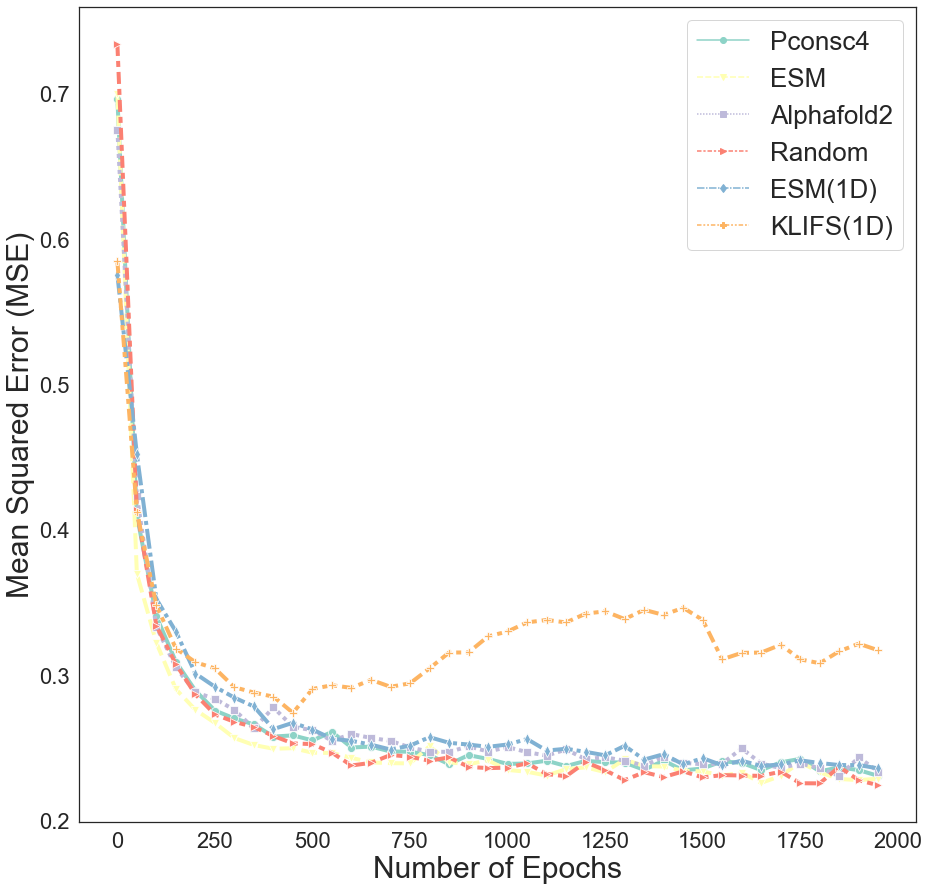

In [47]:

# Set plot style
sns.set(font_scale = 2,style="white")

# colors = sns.color_palette("Set3", n_colors=8)
# custom_palette = [colors[4], colors[5]]
# Create line plot
fig = plt.figure(figsize=(15, 15))
ax = sns.lineplot(x='Epoch', y='MSE', hue='Method', data=df_k[::50], palette='Set3', style="Method",
                  markers=["o", "v", "s", ">", "d", "P"], estimator=None, lw=4, ms=8)

# Set plot labels and legend
ax.set_xlabel('Number of Epochs', fontsize=30)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=30)
plt.legend(loc='upper right', fontsize=26)

# Save plot in different formats
fig.savefig(os.path.join('results_mses','mse_kiba_proteins' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_kiba_proteins' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_kiba_proteins' + '.svg'), dpi=500, bbox_inches='tight')


In [55]:
import pandas as pd

# Define the file paths and method names
file_paths = ['mse_pconcs4_188_2000_file_2.txt', 'mse_kiba_pconcs4_congeneric_2.txt', 'mse_kiba_pconcs4_random_node_0.txt', 'mse_pconcs4_188_2000_2_mol_graph.txt']
method_names = ['Original','Point Random', 'Random Node','Random Sample']

# Initialize an empty list to store the data
data = []

# Loop through each file path and read in the MSE values
for i, file_path in enumerate(file_paths):
    # Read in the data from the file
    with open(file_path, 'r') as f:
        mse_values = f.read().splitlines()
    # Convert the MSE values to float and add the method and epoch information
    for j, mse in enumerate(mse_values):
        data.append([method_names[i], j+1, float(mse)])

# Create a dataframe from the data
df1_k = pd.DataFrame(data, columns=['Method', 'Epoch', 'MSE'])

# Print the dataframe
print(df1_k)


             Method  Epoch       MSE
0          Original      1  0.696789
1          Original      2  0.612902
2          Original      3  0.606571
3          Original      4  0.597323
4          Original      5  0.596111
...             ...    ...       ...
7995  Random Sample   1996  0.394495
7996  Random Sample   1997  0.403077
7997  Random Sample   1998  0.402379
7998  Random Sample   1999  0.397695
7999  Random Sample   2000  0.401559

[8000 rows x 3 columns]


In [56]:
df1_k.to_csv('mse_kiba_ligands.csv',index=False)

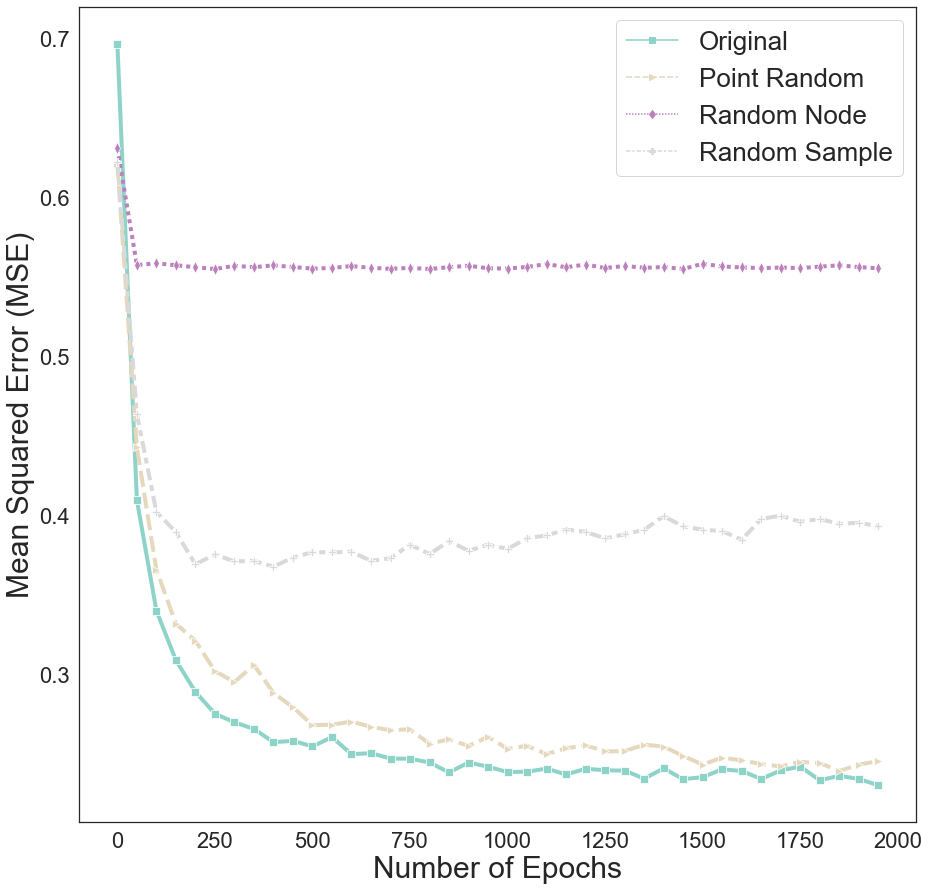

In [57]:
colors = sns.color_palette("Pastel1", n_colors=12)
colors1 = sns.color_palette("Set3", n_colors=10)
custom_palette = [colors1[0], colors[6],colors1[9],colors1[8]]
# Set plot style
sns.set(font_scale = 2,style="white")

# colors = sns.color_palette("Set3", n_colors=8)
# custom_palette = [colors[4], colors[5]]
# Create line plot
fig = plt.figure(figsize=(15, 15))
ax = sns.lineplot(x='Epoch', y='MSE', hue='Method', data=df1_k[::50], palette=custom_palette, style="Method",
                  markers=["s", ">", "d", "P"], estimator=None, lw=4, ms=8)

# Set plot labels and legend
ax.set_xlabel('Number of Epochs', fontsize=30)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=30)
plt.legend(loc='upper right', fontsize=26)

# Save plot in different formats
fig.savefig(os.path.join('results_mses','mse_kiba_ligands' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_kiba_ligands' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_mses','mse_kiba_ligands' + '.svg'), dpi=500, bbox_inches='tight')
